$$EDA$$

Análisis y exploracion de los datos transformados 

In [53]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

visualizar datos en un dataframe

In [83]:
df = pd.read_csv('dengue-zika-clean.csv')

df.head()

,provincia,localidad,cantidad_casos,evento,grupo_etario,semanas_epidemiologicas,año
0,CABA,CABA,1,Dengue,De 45 a 65 años,8,2022
1,CABA,CABA,1,Dengue,De 20 a 24 años,9,2022
2,CABA,CABA,1,Dengue,De 35 a 44 años,16,2022
3,CABA,CABA,1,Dengue,De 10 a 14 años,49,2022
4,CABA,CABA,1,Dengue,De 35 a 44 años,48,2022


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   provincia                293 non-null    object
 1   localidad                293 non-null    object
 2   cantidad_casos           293 non-null    int64 
 3   evento                   293 non-null    object
 4   grupo_etario             293 non-null    object
 5   semanas_epidemiologicas  293 non-null    int64 
 6   año                      293 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 16.1+ KB


In [56]:
df.describe()

,cantidad_casos,semanas_epidemiologicas,año
count,293.000000,293.000000,293.0
mean,2.737201,15.955631,2022.0
std,3.148583,7.404280,0.0
min,1.000000,4.000000,2022.0
25%,1.000000,12.000000,2022.0
50%,1.000000,15.000000,2022.0
75%,3.000000,18.000000,2022.0
max,19.000000,50.000000,2022.0


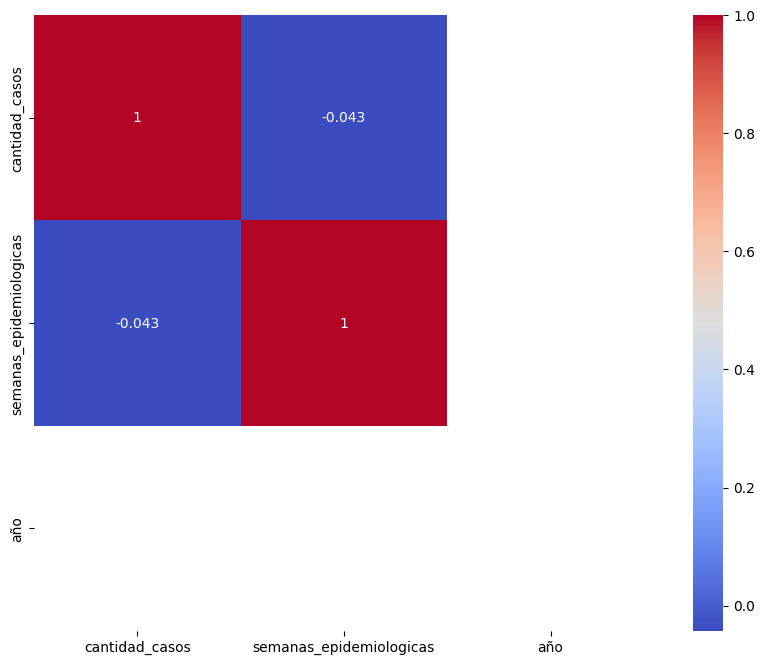

In [64]:
# Excluir columnas no numéricas
df_numeric = df.select_dtypes(include=['int64'])

# Calcula la matriz de correlación
correlation_matrix = df_numeric.corr()

# Genera el mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title= 'Matriz de Correlación'
plt.show()


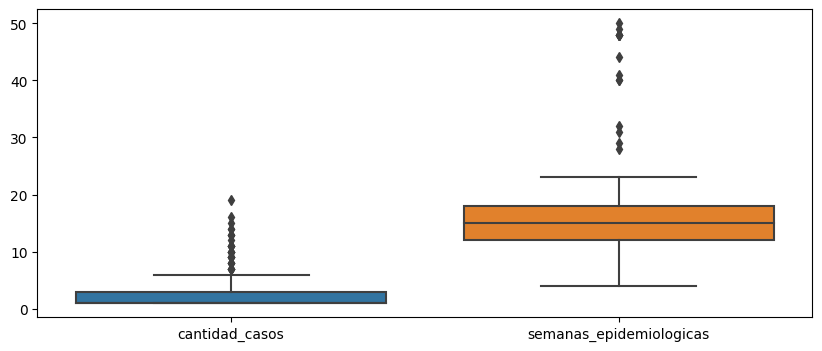

In [65]:
# Gaficar usando BoxPlot en busqueda de outliers

plt.figure(figsize=(10,4))
sns.boxplot(data=df[['cantidad_casos','semanas_epidemiologicas']])
plt.title='BoxPlot'
plt.show()

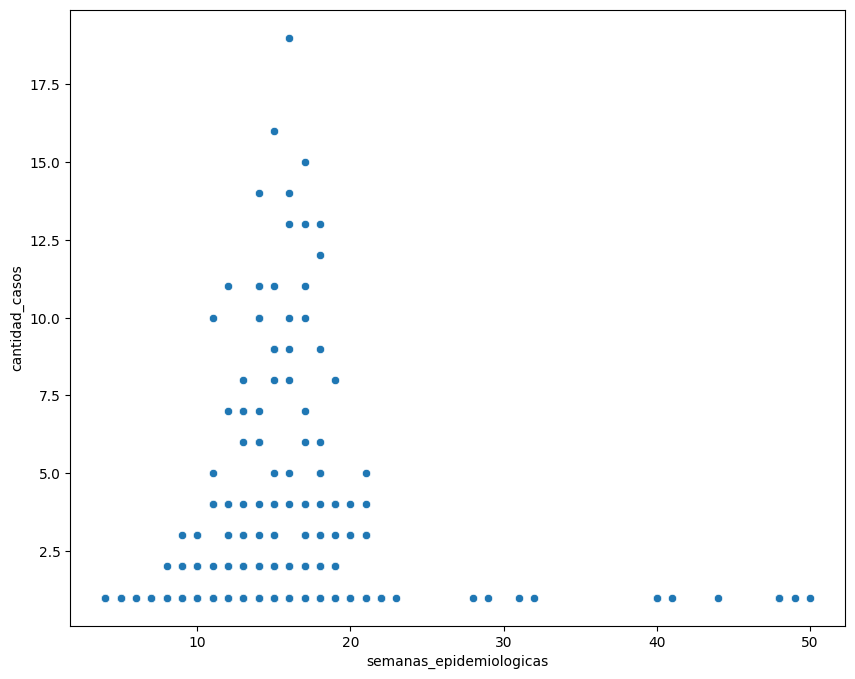

In [76]:

df = df[df['evento'] == 'Dengue']

# Graficar el scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='semanas_epidemiologicas', y='cantidad_casos')
plt.title= "Scatter Plot"
plt.xlabel= "Semana Epidemiológica"
plt.ylabel= "Cantidad Casos"

plt.show()

Se observa un aumento de los casos en las primeras semanas del año, De la semana 10 a la 20(principio de marzo mediados de mayo), en este periodo incluso hasta inicio de junio, teniendo en cuenta que inicia el invierno en estas semanas y que el año 2022 fue particularmente calido en otoño.



El calor puede favorecer la proliferación de mosquitos incluyendo aquellos que transmiten enfermedades como el dengue, el zika y el chikungunya, son más activos y se reproducen más rápidamente en climas cálidos.

El calor acelera el ciclo de vida de los mosquitos, lo que significa que pasan menos tiempo en cada etapa de su desarrollo, desde los huevos hasta los adultos. Esto puede resultar en un aumento de la población de mosquitos. Además, las altas temperaturas suelen favorecer la supervivencia de los mosquitos y la reproducción de las hembras adultas.

Es importante tener en cuenta que la proliferación de mosquitos no solo depende del calor, sino también de otros factores como la disponibilidad de agua estancada, que es donde los mosquitos ponen sus huevos. Por lo tanto, es fundamental tomar medidas de control de mosquitos, como eliminar los criaderos de agua estancada y utilizar métodos de prevención, como repelentes de insectos y mosquiteros, para reducir el riesgo de enfermedades transmitidas por mosquitos.


In [87]:
# Reemplazar el valor en la columna 'grupo_etario'
df['grupo_etario'] = df['grupo_etario'].str.replace('Posneonato (29 hasta 365 dias)', '29 hasta 365 dias')


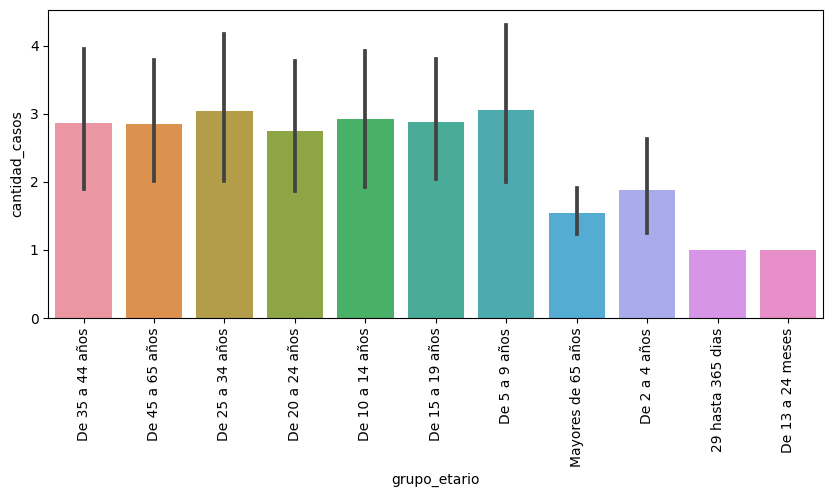

In [88]:
#Gafico de barras

# Ordenar las columnas del DataFrame en orden descendente
df = df.sort_values(by='cantidad_casos', ascending=False)

plt.figure(figsize=(10,4))
#guardo el barplot en una variable para cambiar la orientacion de las etiquetas
ax = sns.barplot(data=df, x='grupo_etario', y='cantidad_casos')
plt.title='Barplot'
plt.xlabel='rango etario'
plt.ylabel='cantidad casos'

# Cambiar la orientación de las etiquetas del eje X a vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#mostrar grafico
plt.show()

El rango de edad mas afectado por el Dengue, inicia en mayores de 5 años hasta menores de 65 años

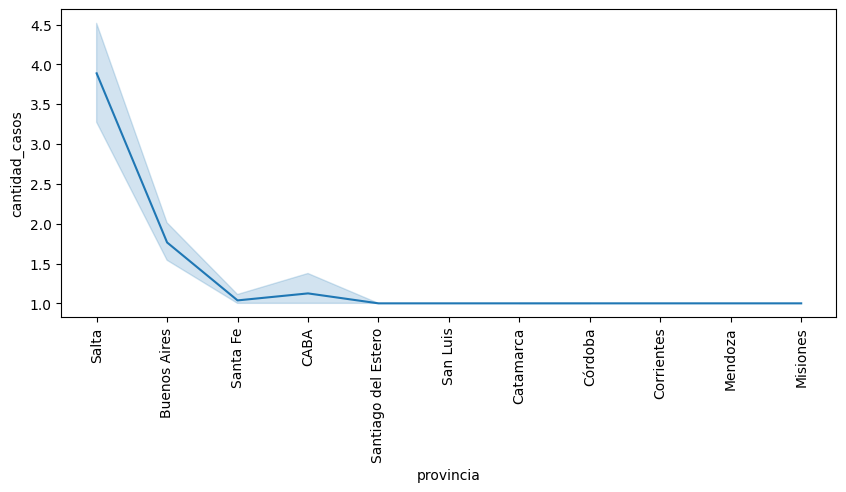

In [94]:
#grafico lineplot de casos por provincias 
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='provincia', y='cantidad_casos')
plt.title='Lineplot provincias'
plt.xlabel='Provincias'
plt.ylabel='cantidad_casos'

plt.xticks(rotation=90)
plt.show()

La provincia de Salta es la mas afectad de la Argentina, seguida por BuenosAires y Capital Federal

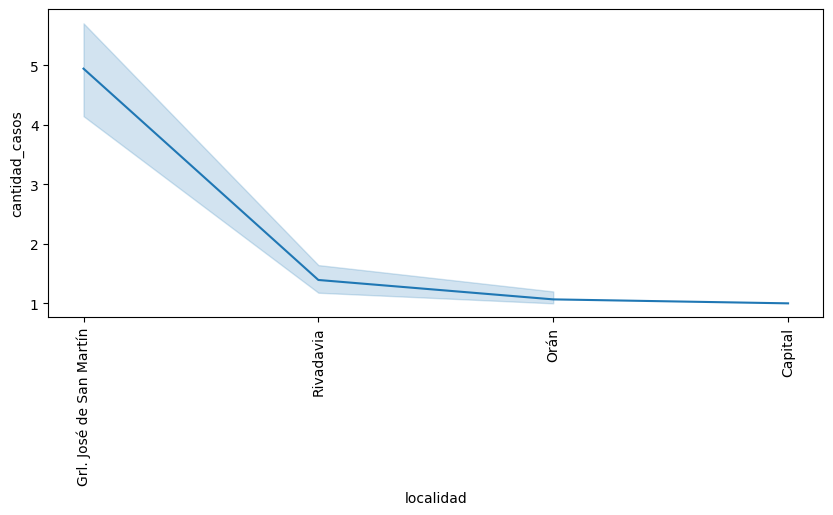

In [100]:
# casos por localidad en la provincia de Salta
df_salta = df[df['provincia']=='Salta']

plt.figure(figsize=(10,4))
sns.lineplot(data=df_salta, x='localidad', y='cantidad_casos')
plt.title='Lineplot'
plt.xlabel='Localidades'
plt.ylabel='cantidad casos'

plt.xticks(rotation=90)
plt.show()

Gral. José de San Martin, Es la localidad de Slata mas afectada por el Dengue